In [1]:
import numpy as np 
from matplotlib import pyplot as plt 
import h5py # used in the Data Visualization section 

from astropy.io import fits,ascii,votable
from astropy import units as u 
from astropy import constants as const
from astropy import table
from astropy.cosmology import Planck15,FlatLambdaCDM

In [2]:
dir_in = '/Users/philipp/Documents/PhD/Data/'
classic = table.Table.read(dir_in + 'COSMOS2020_CLASSIC_processed.fits',format='fits',hdu=1)
farmer = table.Table.read(dir_in + 'COSMOS2020_FARMER_processed.fits',format='fits',hdu=1)

In [3]:
# Filter names, mean wavelength, and other info (see Table 1 in W+21)
filt_name = ['GALEX_FUV', 'GALEX_NUV','CFHT_u','CFHT_ustar','HSC_g', 'HSC_r', 'HSC_i', 'HSC_z', 'HSC_y', 
             'UVISTA_Y', 'UVISTA_J', 'UVISTA_H', 'UVISTA_Ks', 'SC_IB427', 'SC_IB464', 'SC_IA484', 'SC_IB505', 
             'SC_IA527', 'SC_IB574', 'SC_IA624', 'SC_IA679', 'SC_IB709', 'SC_IA738', 'SC_IA767', 'SC_IB827', 
             'SC_NB711', 'SC_NB816', 'UVISTA_NB118', 'SC_B', 'SC_gp', 'SC_V', 'SC_rp', 'SC_ip','SC_zp', 'SC_zpp', 
             'IRAC_CH1', 'IRAC_CH2', 'IRAC_CH3','IRAC_CH4']  
filt_lambda = [0.1526,0.2307,0.3709,0.3858,0.4847,0.6219,0.7699,0.8894,0.9761,1.0216,1.2525,1.6466,2.1557,0.4266,
               0.4635,0.4851,0.5064,0.5261,0.5766,0.6232,0.6780,0.7073,0.7361,0.7694,0.8243,0.7121,0.8150,1.1909,
               0.4488,0.4804,0.5487,0.6305,0.7693,0.8978,0.9063,3.5686,4.5067,5.7788,7.9958]
filt_fwhm = [0.0224,0.07909,0.05181,0.05976,0.1383,0.1547,0.1471,0.0766,0.0786,0.0923,0.1718,0.2905,0.3074,
             0.02073,0.02182,0.02292,0.0231,0.02429,0.02729,0.03004,0.03363,0.03163,0.03235,0.03648,0.0343,0.0072,
             0.01198,0.01122,0.0892,0.1265,0.0954,0.1376,0.1497,0.0847,0.1335,0.7443,1.0119,1.4082,2.8796]

filt_use = ['HSC_g', 'HSC_r', 'HSC_i', 'HSC_z', 'HSC_y', 'UVISTA_Y', 'UVISTA_J', 
            'UVISTA_H', 'UVISTA_Ks']
filt_mask = [i in filt_use for i in filt_name]

## Compare Magnitude Distributions

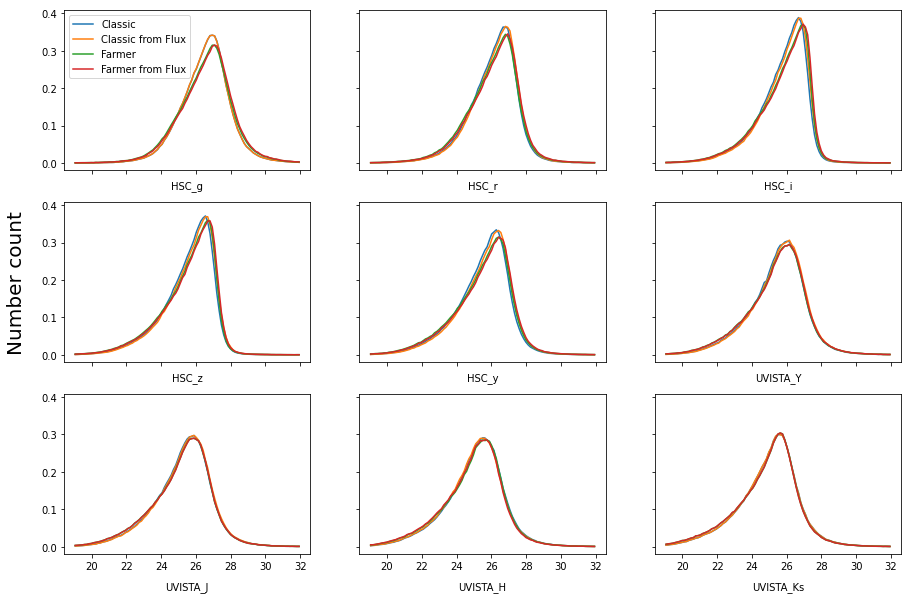

In [16]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10), sharex=True, sharey=True, constrained_layout=False)
bins = np.linspace(19,32,100)
bin_centers = bins[:-1] + (bins[-1] - bins[0])/(2*len(bins))
for ax in axes.flat:
    ax.axis('off')
for ax, (i, filt) in zip(axes.flat, enumerate(filt_use)):
    ax.axis('on')
    classic_hist,_ = np.histogram(classic[filt+'_MAG_APER3'], bins=bins, density=True)
    classic_flux_hist,_ = np.histogram(classic[filt+'_MAGAB'], bins=bins, density=True)
    farmer_hist,_ = np.histogram(farmer[filt+'_MAG'], bins=bins, density=True)
    farmer_flux_hist,_ = np.histogram(farmer[filt+'_MAGAB'], bins=bins, density=True)
    
    ax.plot(bin_centers, classic_hist, label='Classic')
    ax.plot(bin_centers, classic_flux_hist, label='Classic from Flux')
    ax.plot(bin_centers, farmer_hist, label='Farmer')
    ax.plot(bin_centers, farmer_flux_hist, label='Farmer from Flux')
    ax.set_xlabel(filt, labelpad=10)
    if i == 0:
        ax.legend()
    
ax = fig.add_subplot(111, frameon=False)
ax.tick_params(labelcolor='none', top=False, bottom=False,
                left=False, right=False)
ax.set_ylabel('Number count', labelpad=15, fontsize=20)
# plt.subplots_adjust(wspace=0.12, hspace=0.33)
plt.show()

## Compare Fluxes

In [19]:
print(min(classic['HSC_g_FLUX_APER2']),max(classic['HSC_g_FLUX_APER2']))
print(min(classic['HSC_r_FLUX_APER2']),max(classic['HSC_r_FLUX_APER2']))

-2.8629724e-31 1.0454807e-27
-7.5092046e-31 1.4251913e-27


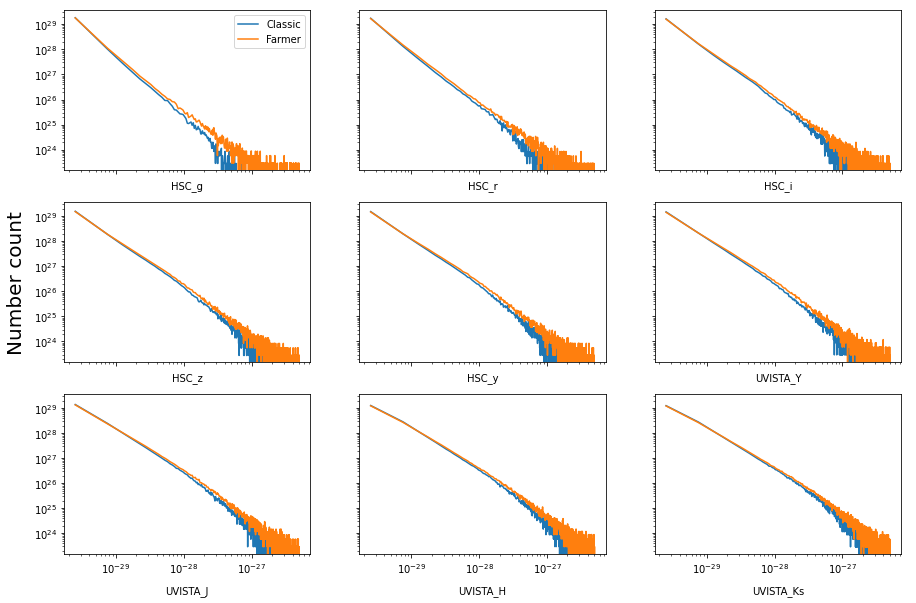

In [25]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10), sharex=True, sharey=True, constrained_layout=False)
bins = np.linspace(1.e-32,5.e-27,1000)
bin_centers = bins[:-1] + (bins[-1] - bins[0])/(2*len(bins))
for ax in axes.flat:
    ax.axis('off')
for ax, (i, filt) in zip(axes.flat, enumerate(filt_use)):
    ax.axis('on')
    classic_hist,_ = np.histogram(classic[filt+'_FLUX_APER3'], bins=bins, density=True)
    farmer_hist,_ = np.histogram(farmer[filt+'_FLUX'], bins=bins, density=True)
    
    ax.plot(bin_centers, classic_hist, label='Classic')
    ax.plot(bin_centers, farmer_hist, label='Farmer')
    ax.set_xlabel(filt, labelpad=10)
    ax.set_xscale('log')
    ax.set_yscale('log')
    if i == 0:
        ax.legend()
    
ax = fig.add_subplot(111, frameon=False)
ax.tick_params(labelcolor='none', top=False, bottom=False,
                left=False, right=False)
ax.set_ylabel('Number count', labelpad=15, fontsize=20)
# plt.subplots_adjust(wspace=0.12, hspace=0.33)
plt.show()